#Selección del set de datos

##Descripción
El dataset "Nike Adidas Shoes for Image Classification" es un conjunto de datos recopilado y compartido en Kaggle por el usuario Ifeanyi Nneji. Este dataset se creó específicamente para la clasificación de imágenes de zapatos de las marcas Nike y Adidas. Las imágenes se extrajeron de bing usando bing_image_search de pypi, se descargaron 400 imágenes de cada clase y luego el conjunto de datos se recortó a 300 (se eliminaron algunas imágenes no relacionadas en el proceso de compilación del conjunto de datos). A continuación, se proporcionarann una descripción detallada del dataset:

* **Tamaño del dataset:** El dataset contiene un total de 576 imágenes en formato .jpg de tenis nike y adidas. Divididos de la siguiente manera:
 * Train: 230 nike y 230 adidas.
 * Test: 30 nike y 30 adidas.
 * Validation: 28 nike y 27 adidas.

* **Distribución de clases:** El dataset está equilibrado, lo que significa que hay una cantidad igual de imágenes de zapatos Nike y Adidas. Esto asegura que tu modelo de clasificación pueda aprender de manera justa y precisa para ambas marcas.

* **Anotaciones:** Cada imagen está etiquetada correctamente con la marca correspondiente, es decir, si es un zapato Nike o un zapato Adidas. Estas etiquetas son cruciales para entrenar un modelo de machine learning capaz de diferenciar entre ambas marcas.

* **Variedad de imágenes:** El dataset contiene una variedad de imágenes de zapatos, incluyendo diferentes estilos, colores y ángulos de visualización. Esto ayudará a tu modelo a capturar las características distintivas de cada marca y realizar una clasificación precisa.

* **Calidad de las imágenes:** Las imágenes del dataset tienen una resolución razonablemente alta y una calidad visual adecuada para el propósito de clasificación. Sin embargo, es posible que se encuentre algunas variaciones en la calidad debido a la diversidad de fuentes y condiciones de captura.



In [ ]:
#Dataset: https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset?select=validation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/IA/AdidasNike"
!ls

/content/drive/MyDrive/IA/AdidasNike
AdidasNike.ipynb  labelnames.csv  test	train  validation


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt 

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import save_model

In [ ]:
labelnames = pd.read_csv('labelnames.csv')
labelnames.head()

,Name,Label
0,aadidas_ (10),Adidas
1,aadidas_ (11),Adidas
2,aadidas_ (12),Adidas
3,aadidas_ (13),Adidas
4,aadidas_ (14),Adidas


In [ ]:
labelnames.describe()

,Name,Label
count,576,576
unique,576,2
top,aadidas_ (10),Nike
freq,1,289


In [ ]:
nikeNum = len(labelnames[labelnames['Label'] == 'Nike'])
print("Numero de fotos de Nike: ", nikeNum)

Numero de fotos de Nike:  289


In [ ]:
AdidasNum = len(labelnames[labelnames['Label'] == 'Adidas'])
print("Numero de fotos de Adidas: ", AdidasNum)

Numero de fotos de Adidas:  287


#Preprocesado de los datos

In [ ]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
nb_train_samples = 460
nb_validation_samples = 55
nb_test_samples = 60
epochs = 50
batch_size = 20

En el proceso de entrenamiento, empleamos ImageDataGenerator para crear imágenes adicionales en la memoria RAM, evitando así el derroche de espacio.

In [ ]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
						#	width_shift_range = 0.2,
						#	height_shift_range = 0.2,
						#	shear_range = 0.3,
						#	zoom_range = 0.3,
							horizontal_flip = True,)

In [ ]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (224, 224),
							batch_size = batch_size,
							class_mode ='binary')

Found 460 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

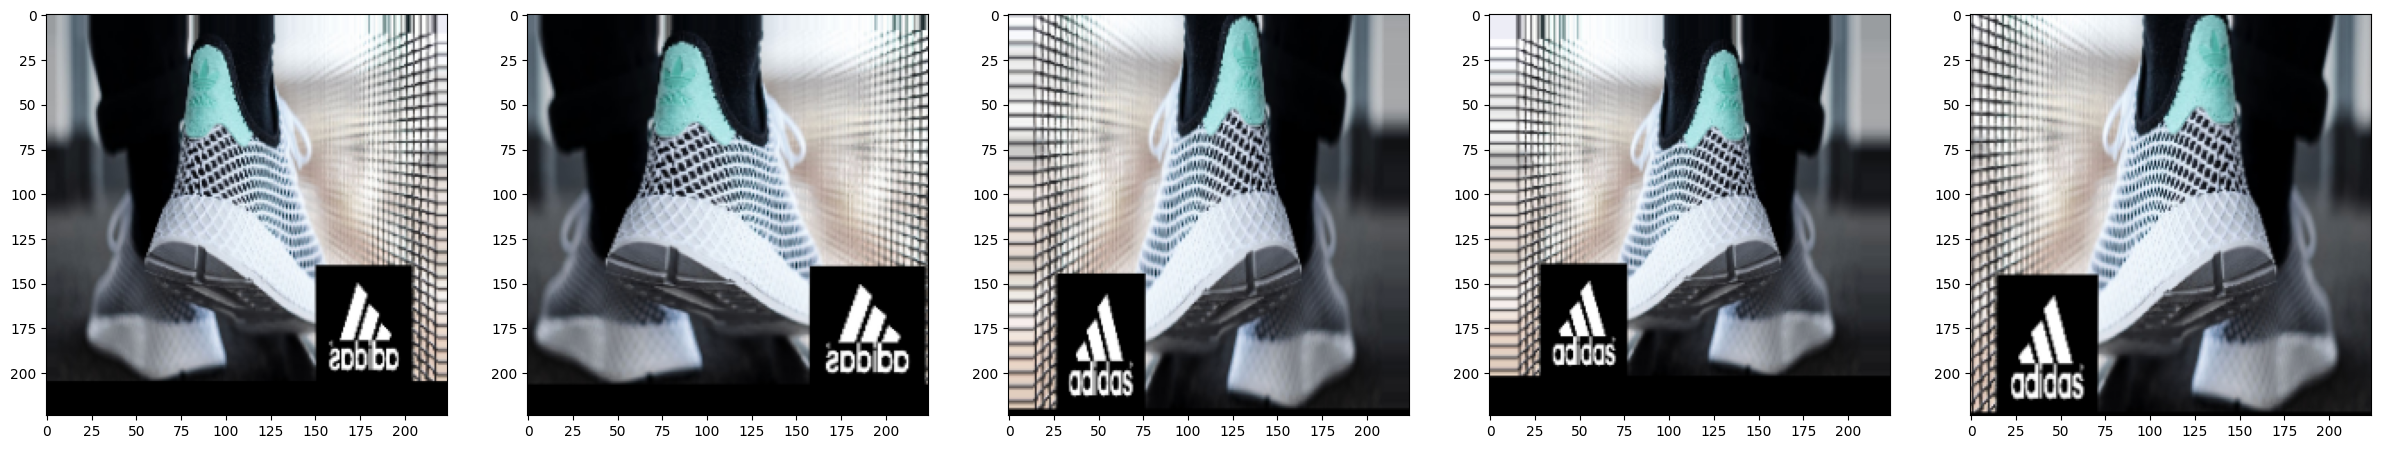

In [ ]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

(20, 224, 224, 3)
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.]


<Figure size 640x480 with 0 Axes>

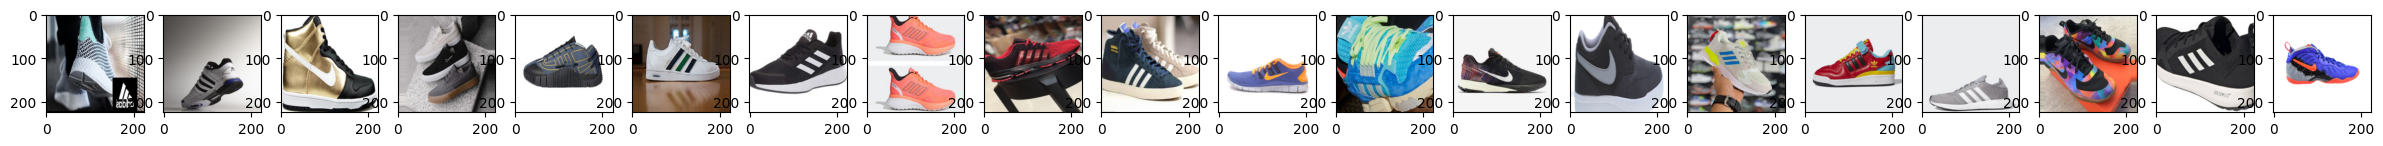

In [ ]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 8)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

In [ ]:
val_datagen = ImageDataGenerator(rescale=1. / 255)
val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (224,224),
							batch_size = batch_size,
							class_mode= 'binary')

Found 55 images belonging to 2 classes.


#Implementación de Modelo

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-18-6f38a6e68fae>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
10/23 [============>.................] - ETA: 29s - loss: 1.0686 - accuracy: 0.5150

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/23 [==============================] - 55s 2s/step - loss: 0.8629 - accuracy: 0.5174 - val_loss: 0.6927 - val_accuracy: 0.5250
Epoch 2/50
23/23 [==============================] - 47s 2s/step - loss: 0.6969 - accuracy: 0.5630 - val_loss: 0.6760 - val_accuracy: 0.6000
Epoch 3/50
23/23 [==============================] - 45s 2s/step - loss: 0.6789 - accuracy: 0.5587 - val_loss: 0.6330 - val_accuracy: 0.5750
Epoch 4/50
23/23 [==============================] - 47s 2s/step - loss: 0.7235 - accuracy: 0.5609 - val_loss: 0.6876 - val_accuracy: 0.5500
Epoch 5/50
23/23 [==============================] - 52s 2s/step - loss: 0.6687 - accuracy: 0.6348 - val_loss: 0.6290 - val_accuracy: 0.6250
Epoch 6/50
23/23 [==============================] - 47s 2s/step - loss: 0.6338 - accuracy: 0.6543 - val_loss: 0.6470 - val_accuracy: 0.7000
Epoch 7/50
23/23 [==============================] - 45s 2s/step - loss: 0.6189 - accuracy: 0.6652 - val_loss: 0.8371 - val_accuracy: 0.4500
Epoch 8/50
23/23 [=============

In [ ]:
model.save('CNN_shoes.h5')

#Evaluación inicial del modelo

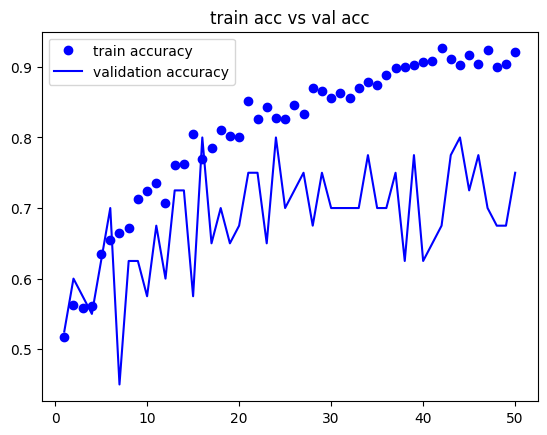

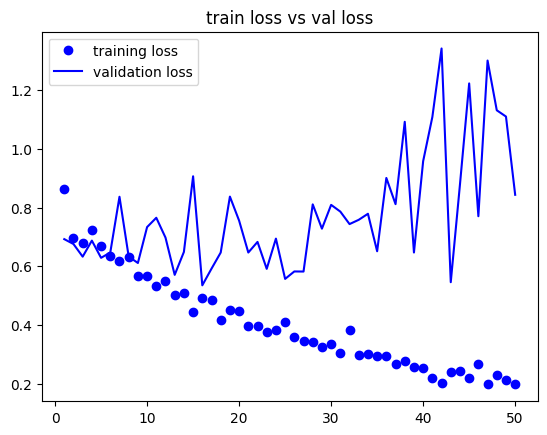

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'bo', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'bo', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (224, 224),
					batch_size = batch_size,
					class_mode= 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps = nb_test_samples // batch_size)
print('\ntest acc :\n', test_acc)
print('\ntest loss :\n', test_loss)

3/3 [==============================] - 3s 878ms/step - loss: 0.9964 - accuracy: 0.7167

test acc :
 0.7166666388511658

test loss :
 0.9964184165000916
